# Gaussian mixture models Clustering

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Aagam0812/DataMining/blob/main/Assignment10/Gaussian.ipynb)


In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt

In [4]:
# Load the dataset to take a look at the first few rows
file_path = '/content/gdrive/MyDrive/DataMining/sales_data_sample.csv'
data = pd.read_csv(file_path, encoding='ISO-8859-1')

# Displaying the first few rows of the dataset
data.head()

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
0,10107,30,95.70,2,2871.00,2/24/2003 0:00,Shipped,1,2,2003,...,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,NaN,Yu,Kwai,Small
1,10121,34,81.35,5,2765.90,5/7/2003 0:00,Shipped,2,5,2003,...,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
2,10134,41,94.74,2,3884.34,7/1/2003 0:00,Shipped,3,7,2003,...,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
3,10145,45,83.26,6,3746.70,8/25/2003 0:00,Shipped,3,8,2003,...,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,NaN,Young,Julie,Medium
4,10159,49,100.00,14,5205.27,10/10/2003 0:00,Shipped,4,10,2003,...,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,NaN,Brown,Julie,Medium


The dataset has been successfully loaded. Here's a brief overview of the first few rows:

It contains columns such as ORDERNUMBER, QUANTITYORDERED, PRICEEACH, ORDERLINENUMBER, SALES, ORDERDATE, STATUS, and various others related to customer orders, including address and contact information.
Some columns appear to have missing values, for example, ADDRESSLINE2, STATE, and POSTALCODE.

In [7]:
# Data Understanding Phase: Exploring the dataset to understand its characteristics

# Basic information about the dataset
info = data.info()
info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2823 entries, 0 to 2822
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ORDERNUMBER       2823 non-null   int64  
 1   QUANTITYORDERED   2823 non-null   int64  
 2   PRICEEACH         2823 non-null   float64
 3   ORDERLINENUMBER   2823 non-null   int64  
 4   SALES             2823 non-null   float64
 5   ORDERDATE         2823 non-null   object 
 6   STATUS            2823 non-null   object 
 7   QTR_ID            2823 non-null   int64  
 8   MONTH_ID          2823 non-null   int64  
 9   YEAR_ID           2823 non-null   int64  
 10  PRODUCTLINE       2823 non-null   object 
 11  MSRP              2823 non-null   int64  
 12  PRODUCTCODE       2823 non-null   object 
 13  CUSTOMERNAME      2823 non-null   object 
 14  PHONE             2823 non-null   object 
 15  ADDRESSLINE1      2823 non-null   object 
 16  ADDRESSLINE2      302 non-null    object 


In [9]:
# Statistical summary of the dataset
summary = data.describe(include='all')
summary

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,...,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823,2823,2823.000000,2823.000000,2823.00000,...,2823,302,2823,1337,2747,2823,1749,2823,2823,2823
unique,NaN,NaN,NaN,NaN,NaN,252,6,NaN,NaN,NaN,...,92,9,73,16,73,19,3,77,72,3
top,NaN,NaN,NaN,NaN,NaN,11/14/2003 0:00,Shipped,NaN,NaN,NaN,...,"C/ Moralzarzal, 86",Level 3,Madrid,CA,28034,USA,EMEA,Freyre,Diego,Medium
freq,NaN,NaN,NaN,NaN,NaN,38,2617,NaN,NaN,NaN,...,259,55,304,416,259,1004,1407,259,259,1384
mean,10258.725115,35.092809,83.658544,6.466171,3553.889072,NaN,NaN,2.717676,7.092455,2003.81509,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,92.085478,9.741443,20.174277,4.225841,1841.865106,NaN,NaN,1.203878,3.656633,0.69967,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,10100.000000,6.000000,26.880000,1.000000,482.130000,NaN,NaN,1.000000,1.000000,2003.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,10180.000000,27.000000,68.860000,3.000000,2203.430000,NaN,NaN,2.000000,4.000000,2003.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,10262.000000,35.000000,95.700000,6.000000,3184.800000,NaN,NaN,3.000000,8.000000,2004.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,10333.500000,43.000000,100.000000,9.000000,4508.000000,NaN,NaN,4.000000,11.000000,2004.00000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* The dataset consists of 2823 rows and 25 columns.
* It includes various data types: integers (int64), floating points (float64), and objects (typically strings, object).
* Key columns include ORDERNUMBER, QUANTITYORDERED, PRICEEACH, SALES, ORDERDATE, STATUS, among others.
* There are missing values in several columns such as ADDRESSLINE2, STATE, POSTALCODE, and TERRITORY.
* The describe() method provides a statistical summary for numerical columns and shows the count, unique values, top values, and frequency for object-type columns.

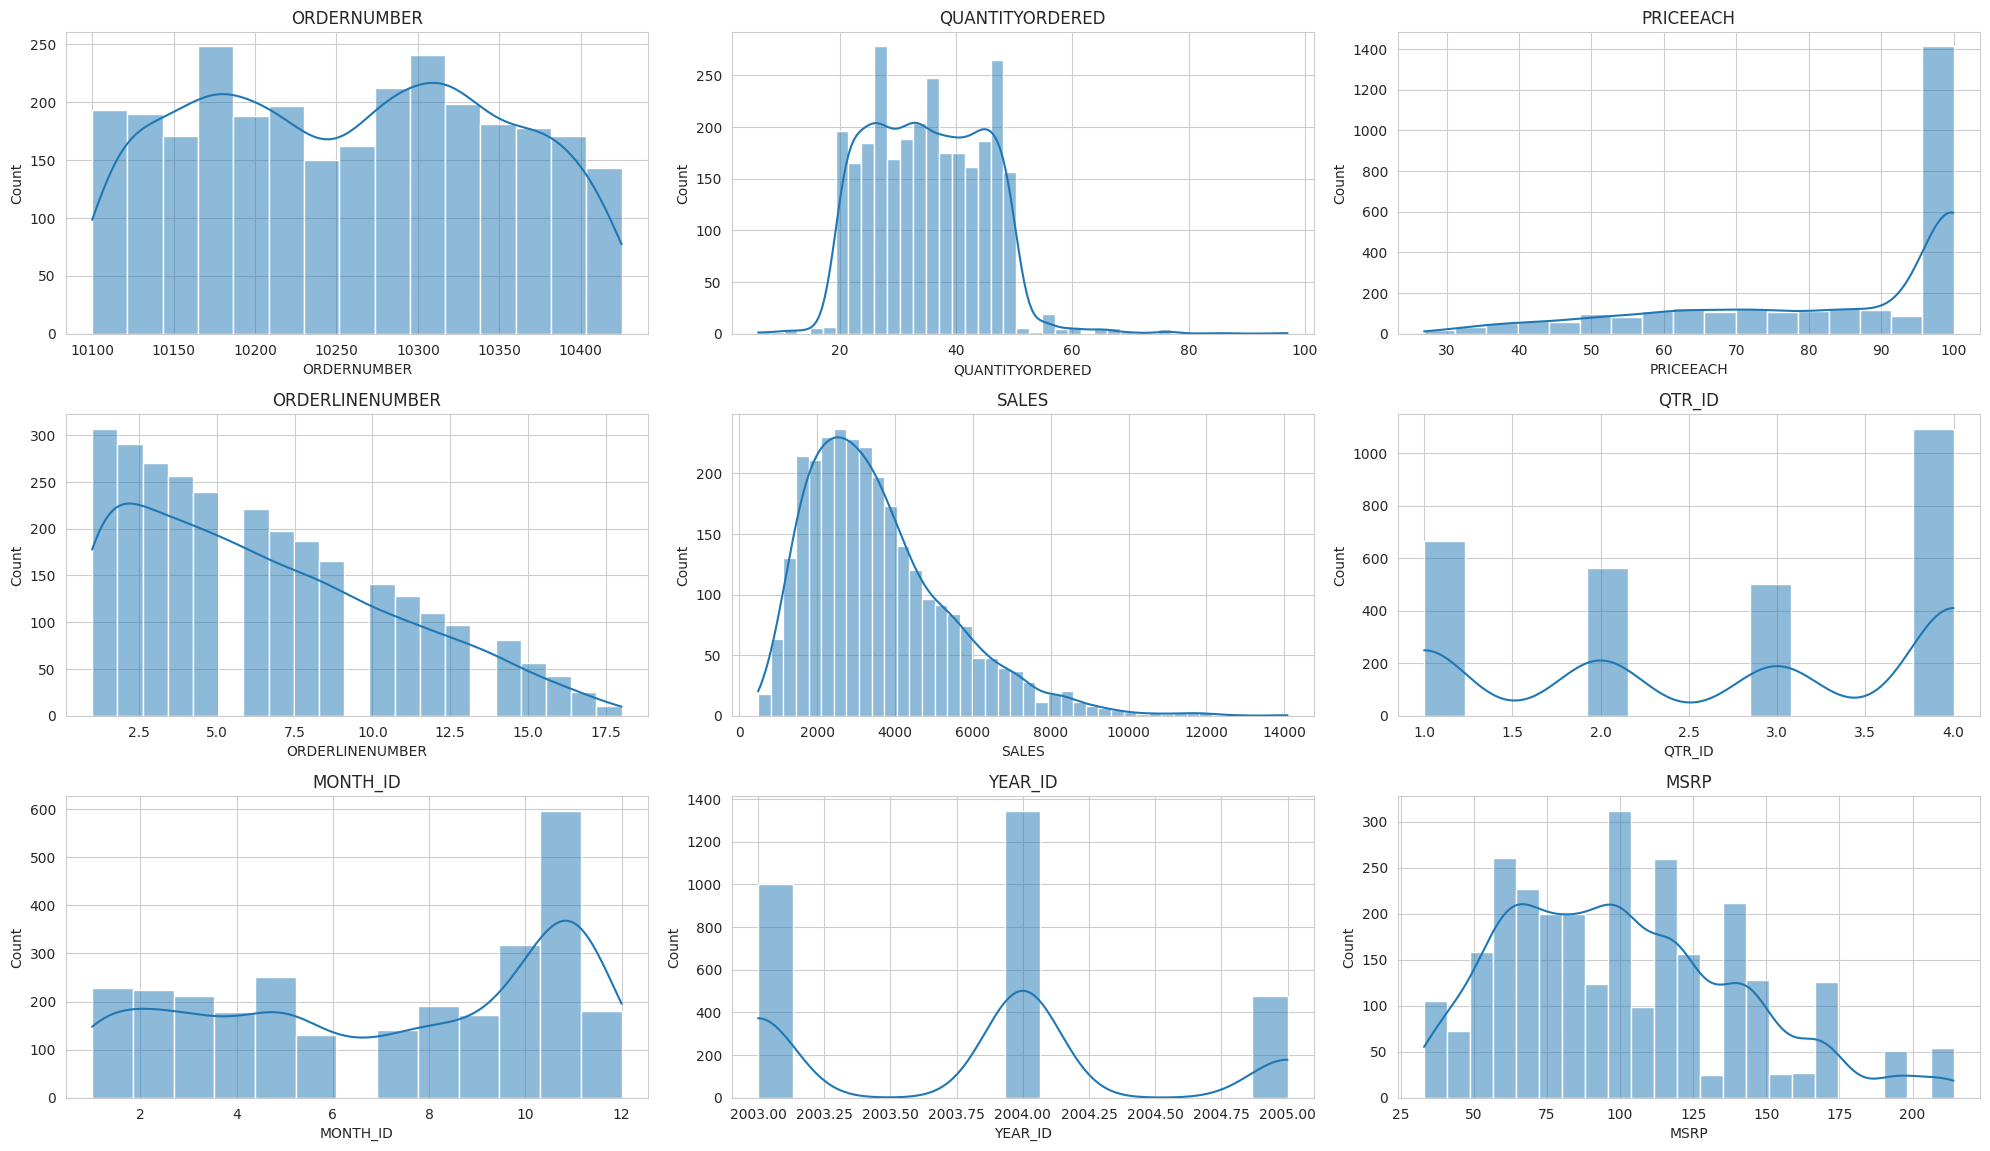

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the aesthetic style of the plots
sns.set_style("whitegrid")

# Creating a list of numerical columns for visualization
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

# Creating histograms for numerical columns
plt.figure(figsize=(20, 15))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(col)
    plt.tight_layout()

plt.show()


The histograms provide insights into the distribution of the numerical variables in the dataset:

* ORDERNUMBER, QTR_ID, MONTH_ID, YEAR_ID: These columns appear to have a discrete distribution and show specific patterns, such as peaks in certain years or months.
* QUANTITYORDERED: This shows a somewhat right-skewed distribution, indicating that smaller quantities are ordered more frequently than larger quantities.
* PRICEEACH: The distribution is also somewhat right-skewed, suggesting that items with lower prices are more commonly sold.
* ORDERLINENUMBER: This column has a discrete distribution, with certain line numbers being more frequent.
* SALES: The distribution of sales is right-skewed, indicating that lower sales values occur more frequently.
* MSRP (Manufacturer's Suggested Retail Price): This also exhibits a right-skewed distribution.

In [11]:
# Data Cleaning Phase

# Handling missing values in the dataset
missing_values = data.isnull().sum()
missing_values = missing_values[missing_values > 0]  # Filtering out columns with no missing values

# Percentage of missing values in each column
missing_percentage = (missing_values / len(data)) * 100

# Displaying the columns with missing values and their percentage
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_data.sort_values(by='Percentage', ascending=False)


,Missing Values,Percentage
ADDRESSLINE2,2521,89.302161
STATE,1486,52.639036
TERRITORY,1074,38.044633
POSTALCODE,76,2.692171


The analysis of missing values in the dataset reveals the following:

* ADDRESSLINE2: Approximately 89.3% of its values are missing. Given the high percentage, it might be reasonable to consider dropping this column unless it is crucial for the analysis.
* STATE: About 52.6% of its values are missing. This column's relevance should be evaluated based on the analysis requirements.
* TERRITORY: 38.0% of its values are missing. Decisions on how to handle these missing values depend on the importance of this variable.
* POSTALCODE: Only 2.7% of its values are missing, which could potentially be imputed or the missing rows could be removed depending on the dataset size and the analysis needs.

In [12]:
# Handling missing values and data type inconsistencies

# Dropping the 'ADDRESSLINE2' column due to a high percentage of missing values
data_cleaned = data.drop(columns=['ADDRESSLINE2'])

# Imputing missing values for 'STATE' and 'TERRITORY' with a placeholder value (e.g., 'Unknown')
data_cleaned['STATE'].fillna('Unknown', inplace=True)
data_cleaned['TERRITORY'].fillna('Unknown', inplace=True)

# For 'POSTALCODE', considering its low percentage of missing values, we can either remove these rows or impute them.
# Here, we'll opt for removal since the percentage is quite low.
data_cleaned.dropna(subset=['POSTALCODE'], inplace=True)

# Checking data types and converting 'ORDERDATE' to a datetime format
data_cleaned['ORDERDATE'] = pd.to_datetime(data_cleaned['ORDERDATE'], errors='coerce')

# Displaying the info of the cleaned data to verify the changes
data_cleaned_info = data_cleaned.info()
data_cleaned_info



<class 'pandas.core.frame.DataFrame'>
Int64Index: 2747 entries, 0 to 2822
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   ORDERNUMBER       2747 non-null   int64         
 1   QUANTITYORDERED   2747 non-null   int64         
 2   PRICEEACH         2747 non-null   float64       
 3   ORDERLINENUMBER   2747 non-null   int64         
 4   SALES             2747 non-null   float64       
 5   ORDERDATE         2747 non-null   datetime64[ns]
 6   STATUS            2747 non-null   object        
 7   QTR_ID            2747 non-null   int64         
 8   MONTH_ID          2747 non-null   int64         
 9   YEAR_ID           2747 non-null   int64         
 10  PRODUCTLINE       2747 non-null   object        
 11  MSRP              2747 non-null   int64         
 12  PRODUCTCODE       2747 non-null   object        
 13  CUSTOMERNAME      2747 non-null   object        
 14  PHONE             2747 n

The data cleaning steps have been successfully applied:

* Dropped ADDRESSLINE2: This column was removed due to a high percentage of missing values.
* Imputed Missing Values in STATE and TERRITORY: Missing values in these columns were replaced with the placeholder 'Unknown'.
* Removed Rows with Missing POSTALCODE: Given the low percentage of missing values, rows with missing postal codes were removed.
* Data Type Correction: The ORDERDATE column has been converted to a datetime format for better handling of date-related operations.

After these modifications, the dataset now has 24 columns and 2747 rows. All columns have non-null values, ensuring a more consistent and clean dataset for further analysis.

In [ ]:
# Data pre-processing
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data.select_dtypes(include=['object', 'datetime']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

data_preprocessed = preprocessor.fit_transform(data).toarray()

In [18]:
# Data Pre-processing

# Selecting numerical and categorical columns for pre-processing
numerical_cols = data_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = data_cleaned.select_dtypes(include=['object','datetime']).columns



# Creating transformers for numerical and categorical data
numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

# Creating a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Applying the transformations to the data
data_preprocessed = preprocessor.fit_transform(data_cleaned).toarray()

# The preprocessed data is now in a NumPy array format. We need to convert it back to a DataFrame.
# However, for Gaussian Mixture Model clustering, we don't necessarily need to convert it back to DataFrame.
# We can proceed with the array format if that's acceptable.

# Checking the shape of the preprocessed data
data_preprocessed.shape


(2747, 978)

In [40]:
from sklearn.decomposition import PCA

# Applying PCA for dimensionality reduction

# Choosing the number of components such that 95% of the variance is retained
pca = PCA(n_components=0.95)
data_pca = pca.fit_transform(data_preprocessed)

# Checking the shape of the data after PCA
data_pca.shape


(2747, 151)

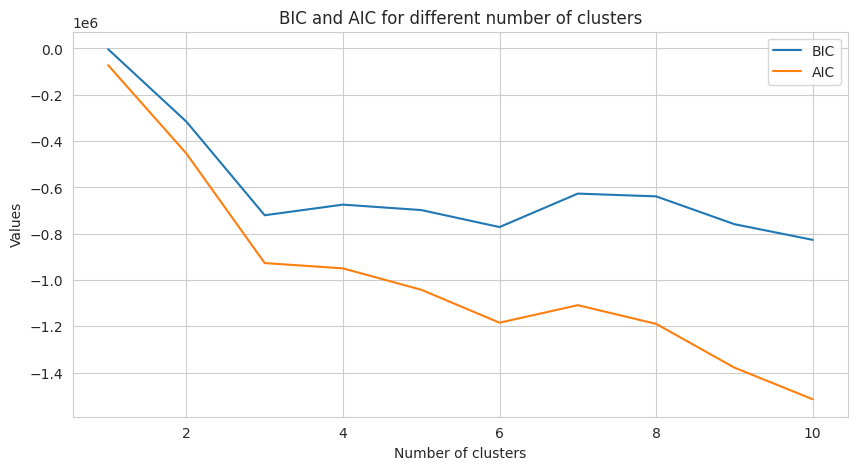

In [41]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Finding the optimal number of clusters for GMM

# Range of potential number of clusters to evaluate
n_clusters = range(1, 11)

# Lists to store BIC and AIC values
bics = []
aics = []

# Calculating BIC and AIC for each number of clusters
for n in n_clusters:
    gmm = GaussianMixture(n_components=n, random_state=0)
    gmm.fit(data_pca)
    bics.append(gmm.bic(data_pca))
    aics.append(gmm.aic(data_pca))

# Plotting BIC and AIC values
plt.figure(figsize=(10, 5))
plt.plot(n_clusters, bics, label='BIC')
plt.plot(n_clusters, aics, label='AIC')
plt.xlabel('Number of clusters')
plt.ylabel('Values')
plt.title('BIC and AIC for different number of clusters')
plt.legend()
plt.show()


In [44]:
from sklearn.mixture import GaussianMixture

# Assuming data_preprocessed_dense is your preprocessed dataset

# Choosing a number of clusters for GMM,
n_clusters = 2

# Creating the GMM model
gmm_model = GaussianMixture(n_components=n_clusters, random_state=0)

# Fitting the model to the data
gmm_model.fit(data_pca)

# Getting the cluster labels
cluster_labels = gmm_model.predict(data_pca)

# Optionally, you can also obtain the probabilities of each sample belonging to each cluster
cluster_probabilities = gmm_model.predict_proba(data_pca)

# Display the first few cluster labels and probabilities
print(cluster_labels[:10])
print(cluster_probabilities[:10])


[1 0 1 0 0 0 1 0 0 1]
[[2.56685839e-016 1.00000000e+000]
 [1.00000000e+000 2.06282333e-027]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 2.83187132e-158]
 [1.00000000e+000 7.16972991e-032]
 [1.00000000e+000 1.97178698e-270]
 [0.00000000e+000 1.00000000e+000]
 [1.00000000e+000 9.37205148e-277]
 [1.00000000e+000 1.67052480e-026]
 [5.10875039e-182 1.00000000e+000]]


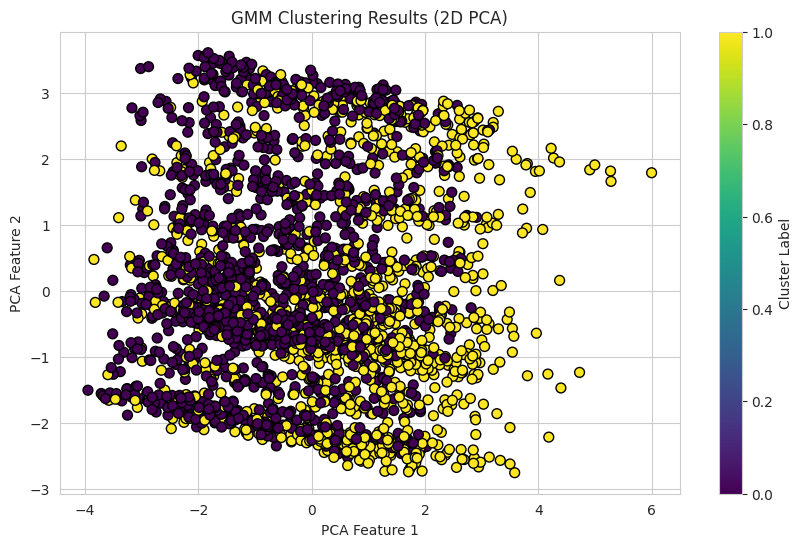

In [45]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA


# Reduce the dataset to 2 dimensions using PCA for visualization
# pca = PCA(n_components=2)
# reduced_data = pca.fit_transform(data_pca)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(data_pca[:, 0], data_pca[:, 1], c=cluster_labels, cmap='viridis', marker='o', edgecolor='k', s=50)

plt.title('GMM Clustering Results (2D PCA)')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


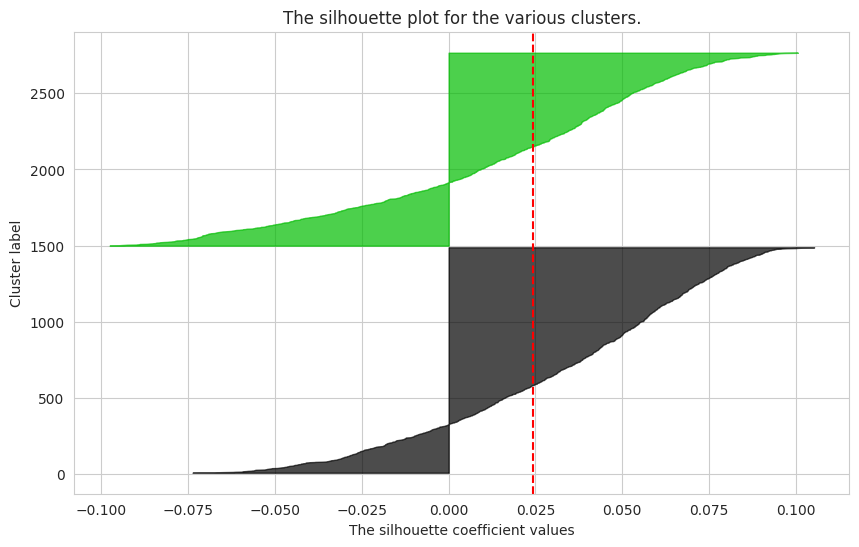

In [46]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Compute the silhouette scores for each sample
silhouette_avg = silhouette_score(data_preprocessed, cluster_labels)
sample_silhouette_values = silhouette_samples(data_preprocessed, cluster_labels)

plt.figure(figsize=(10, 6))
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    y_lower = y_upper + 10  # 10 for the 0 samples

plt.title("The silhouette plot for the various clusters.")
plt.xlabel("The silhouette coefficient values")
plt.ylabel("Cluster label")
plt.axvline(x=silhouette_avg, color="red", linestyle="--")
plt.show()
